<a href="https://colab.research.google.com/github/NiloferMubeen/Recommendation_Systems/blob/main/Recommendation_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
titles = pd.read_csv("/content/Movie_Id_Titles.txt")
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
# merging both the dataframes

movies = df.merge(titles,on='item_id')
movies.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [18]:
# Average rating of all the movies

ratings = pd.DataFrame(movies.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [20]:
# Also finding the number of ratings for every movie

ratings['num of ratings'] = pd.DataFrame(movies.groupby('title')['rating'].count())
ratings.reset_index().head()

,title,rating,num of ratings
0,'Til There Was You (1997),2.333333,9
1,1-900 (1994),2.600000,5
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
4,187 (1997),3.024390,41


<Axes: >

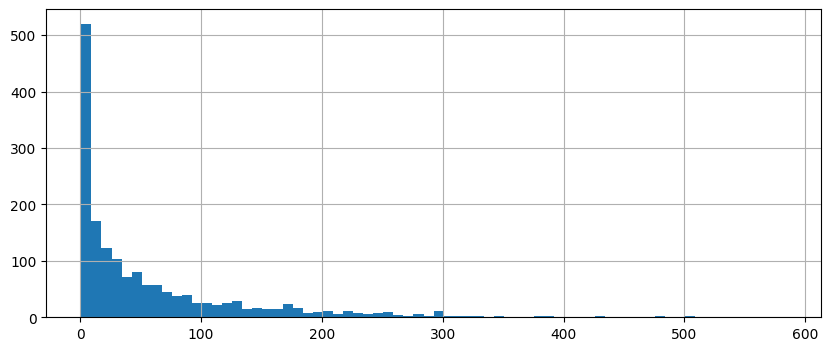

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<Axes: >

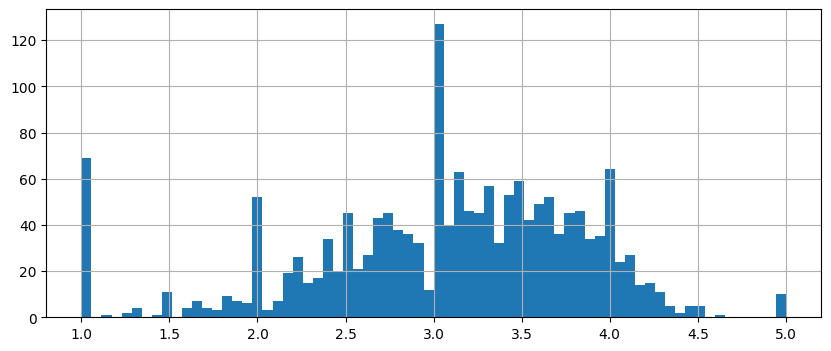

In [22]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

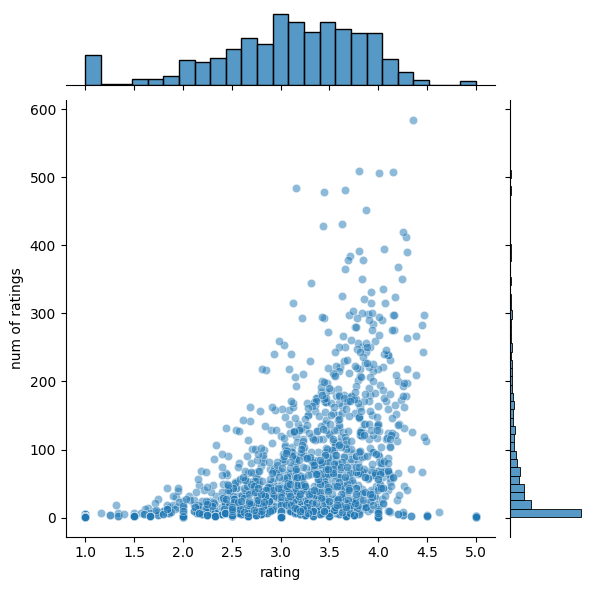

In [24]:
import seaborn as sns


sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

# Recommendation of similar movies

In [25]:
moviemat = movies.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [57]:
def recommend_movies(movie):
  user_ratings = moviemat[movie]
  user_ratings.dropna(inplace=True)
  similar_movies = moviemat.corrwith(user_ratings)
  corr_tab = pd.DataFrame(similar_movies,columns=['Correlation'])
  corr_tab.sort_values('Correlation',ascending=False)
  corr_tab = corr_tab.join(ratings['num of ratings'])
  result = corr_tab[corr_tab['num of ratings']>100].sort_values('Correlation',ascending=False).reset_index().head(6)[1:]
  print("Top 5 Movies recommended for you: \n\n",('\n').join(result['title'].to_list()))


In [58]:
recommend_movies('Liar Liar (1997)')

Top 5 Movies recommended for you: 

 Batman Forever (1995)
Mask, The (1994)
Down Periscope (1996)
Con Air (1997)
Pretty Woman (1990)


In [59]:
recommend_movies('Star Wars (1977)')

Top 5 Movies recommended for you: 

 Empire Strikes Back, The (1980)
Return of the Jedi (1983)
Raiders of the Lost Ark (1981)
Austin Powers: International Man of Mystery (1997)
Sting, The (1973)


In [60]:
recommend_movies("Scream (1996)")

Top 5 Movies recommended for you: 

 Scream 2 (1997)
Seven (Se7en) (1995)
Starship Troopers (1997)
Nightmare on Elm Street, A (1984)
Cape Fear (1991)
